# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings('ignore')


# Import the data

In [2]:
# List of file names
file_names = ['#voicetoparliament1.xlsx', '#voicetoparliament2.xlsx', '#voicetoparliament3.xlsx', '#voicetoparliament4.xlsx', '#voicetoparliament5.xlsx']

# Initialize an empty DataFrame
df = pd.DataFrame()

# Loop through the file names and read each Excel file, appending to the main DataFrame
for file_name in file_names:
    temp_df = pd.read_excel(file_name)
    df = df.append(temp_df, ignore_index=True)


In [3]:
# check the shape of the data
print("Data Shape:", df.shape)


Data Shape: (161, 20)


In [4]:
# Drop the last two columns
df = df.iloc[:, :-2]
df.head()

,Account,User Name,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Views,Like and View Counts Disabled,URL,Link,Photo,Title,Description,Image Text
0,ABC News,abcnews_au,855594.0,2023-06-19 11:20:36 AEST,2023-06-19,11:20:36,Album,5265,5000,265,0,False,https://www.instagram.com/p/Ctpz5tvP1ua/,https://www.instagram.com/p/Ctpz5tvP1ua/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,Australians will vote this year on whether a V...,NaN
1,ABC News,abcnews_au,849704.0,2023-05-31 10:47:01 AEST,2023-05-31,10:47:01,Album,2692,2486,206,0,False,https://www.instagram.com/p/Cs409OHv26J/,https://www.instagram.com/p/Cs409OHv26J/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,The legislation to set up the referendum on en...,NaN
2,ABC Indigenous,abcindigenous,169523.0,2023-06-02 10:32:51 AEST,2023-06-02,10:32:51,Album,1754,1731,23,0,False,https://www.instagram.com/p/Cs987J6Bul_/,https://www.instagram.com/p/Cs987J6Bul_/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,The legislation to set up the referendum on en...,NaN
3,ABC News,abcnews_au,856096.0,2023-06-21 20:03:47 AEST,2023-06-21,20:03:47,Photo,1482,1472,10,0,False,https://www.instagram.com/p/Ctv5XX2Pruy/,https://www.instagram.com/p/Ctv5XX2Pruy/,https://scontent-sjc3-1.cdninstagram.com/v/t51...,NaN,Bundjalung Widubul-Wiabul Woman Vanessa Turnbu...,‎'‎هง Vanessa Turnbull-Roberts Lawyer and huma...
4,The Australian,the.australian,187395.0,2023-05-30 16:10:17 AEST,2023-05-30,16:10:17,Album,1147,1037,110,0,False,https://www.instagram.com/p/Cs21JPBoqoq/,https://www.instagram.com/p/Cs21JPBoqoq/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,Aboriginal elder Miriam-Rose Ungunmerr Baumann...,NaN


In [5]:
# Select relevant columns
df1 = df[['Total Interactions', 'Likes', 'Comments', 'Views', 'Type', 'Description']]
df1.sample(10)

,Total Interactions,Likes,Comments,Views,Type,Description
9,601,358,243,0,Photo,Linda Burney has declared the Indigenous #Voic...
3,1482,1472,10,0,Photo,Bundjalung Widubul-Wiabul Woman Vanessa Turnbu...
15,342,335,7,0,Album,"In an historic moment this morning, Parliament..."
27,85,76,9,0,Album,#BREAKING: South Australia has delayed the int...
14,380,380,0,0,Photo,‘Be a Voice for Generations’ is this year’s th...
4,1147,1037,110,0,Album,Aboriginal elder Miriam-Rose Ungunmerr Baumann...
74,18,18,0,0,Album,Today at the International Wall of Friendship ...
42,49,45,4,0,Photo,New work shirt. Who dis? @yes23au #VoiceTreaty...
108,9,9,0,0,Photo,🔎THE VOICE: GET THE FACTS🔍\n\nDid you know tha...
157,1,1,0,0,Album,Indigenous senators say more than just Aborigi...


In [6]:
# Descriptive statistics of the dataset
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
Total Interactions,161.0,143.453416,518.532014,0.0,8.0,17.0,50.0,5265.0
Likes,161.0,130.801242,486.465657,0.0,7.0,16.0,47.0,5000.0
Comments,161.0,12.652174,45.968095,0.0,0.0,0.0,2.0,265.0
Views,161.0,2.155280,23.078821,0.0,0.0,0.0,0.0,287.0


In [7]:
# Shape of the dataset
df1.shape


(161, 6)

In [8]:
# Data info
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Total Interactions  161 non-null    int64 
 1   Likes               161 non-null    int64 
 2   Comments            161 non-null    int64 
 3   Views               161 non-null    int64 
 4   Type                161 non-null    object
 5   Description         161 non-null    object
dtypes: int64(4), object(2)
memory usage: 7.7+ KB


In [9]:
# Check for missing values
df1.isna().sum()


Total Interactions    0
Likes                 0
Comments              0
Views                 0
Type                  0
Description           0
dtype: int64

# Data Preprocessing

In [10]:
# Convert the 'Type' column to a categorical variable
df1['Type'] = df1['Type'].astype('category')


## Text Data Preprocessing

In [11]:
# Tokenize the 'Description' column
df1['Description'] = df1['Description'].apply(word_tokenize)


## Normalize the Numeric Columns

In [12]:
# Normalize numeric columns
scaler = MinMaxScaler()
df1[['Total Interactions', 'Likes', 'Comments', 'Views']] = scaler.fit_transform(df1[['Total Interactions', 'Likes', 'Comments', 'Views']])


# Exploratory Data Analysis

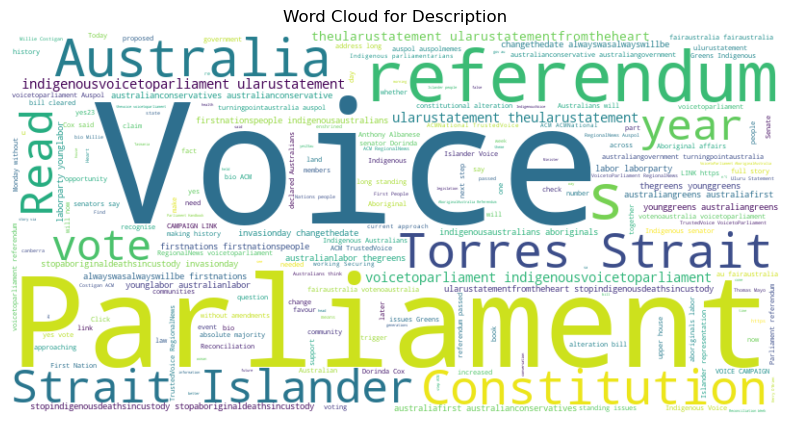

In [13]:
# EDA
from wordcloud import WordCloud

# Combine all 'Description' text data into a single string
all_text = ' '.join(' '.join(tokens) for tokens in df1['Description'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Description')
plt.show()


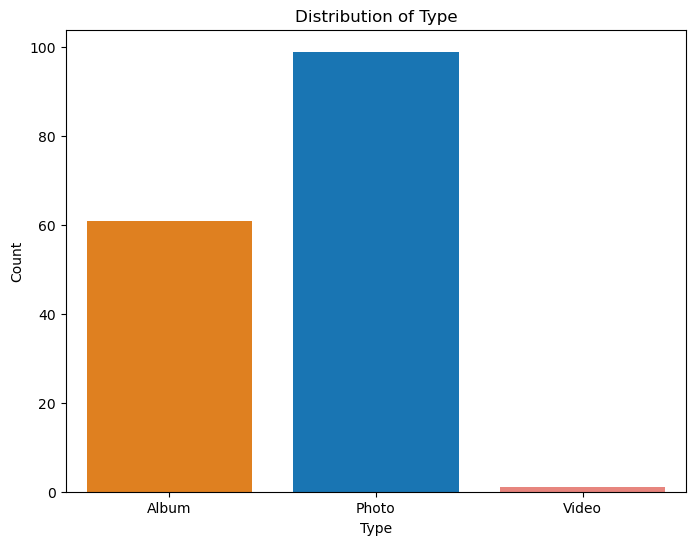

In [14]:
# Define custom colors
custom_colors = ['#FF8000', '#007ACC', '#F8766D']

# Countplot for 'Type' column with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Type', palette=custom_colors)
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show();


# Topic Modeling - Preprocessing

In [15]:
# Tokenization and stop word removal
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return " ".join(filtered_words)

df1['cleaned_Description'] = df1['Description'].apply(preprocess_text)


In [16]:
# Topic Modeling - Model Training
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df1['cleaned_Description'])

# Apply LDA
num_topics = 5  # You can adjust this number based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

In [17]:
# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words.append([feature_names[i] for i in top_idx])
    return top_words

n_top_words = 10  # Number of top words to display for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names, n_top_words)

# Print the top words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {', '.join(words)}")

# Assign themes to descriptions based on the dominant topic
df1['dominant_topic'] = lda.transform(X).argmax(axis=1)

# Map topic numbers to themes
topic_to_theme = {
    0: 'Theme 1: Australian Referendum and Voice to Parliament',
    1: 'Theme 2: Voice to Parliament Campaign and Advocacy',
    2: 'Theme 3: Indigenous Representation in Parliament',
    3: 'Theme 4: Misinformation and Opposition to Voice to Parliament',
    4: 'Theme 5: Voice to Parliament Advocacy Events and Updates',
}

df1['theme'] = df1['dominant_topic'].map(topic_to_theme)


Topic 1: voice, parliament, voice parliament, voicetoparliament, referendum, indigenous, people, link, auspol, bio
Topic 2: voice, referendum, torres, aboriginal torres, islander, torres strait, strait, strait islander, australia, aboriginal
Topic 3: voicetoparliament, referendum, voice, bill, indigenous, australians, link, story, read, read full
Topic 4: fairaustralia, voicetoparliament, labor, firstnations, alwayswasalwayswillbe, auspol, australiangovernment, australianconservatives australianconservative, australiafirst australianconservatives, australianconservatives
Topic 5: indigenous, aboriginal, referendum, voicetoparliament, say, parliament, auspol, said, aboriginal torres, torres


In [18]:
# Data Analysis - Theme Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a Document-Term Matrix (DTM)
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df1['cleaned_Description'])

# Fit an LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Specify the number of topics
lda_output = lda_model.fit_transform(dtm)

# Extract and explore topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10  # Specify the number of top words for each topic
print_top_words(lda_model, vectorizer.get_feature_names_out(), n_top_words)

# Assign topics to documents
df1['topic'] = lda_output.argmax(axis=1)


Topic #1:
referendum voice aboriginal indigenous voicetoparliament parliament torres strait islander vote

Topic #2:
fairaustralia voicetoparliament auspol firstnations labor alwayswasalwayswillbe auspolmemes australiafirst australianconservative australianconservatives

Topic #3:
voice parliament referendum proposed voicetoparliament link reconciliation australia bio professor

Topic #4:
voice voicetoparliament indigenous referendum parliament australians link read bio regionalnews

Topic #5:
voice voicetoparliament people week constitution parliament year reconciliation referendum long



In [19]:
# Create a dictionary to store examples for each theme
theme_examples = {}

# Iterate through themes
for theme in df1['theme'].unique():
    # Filter the DataFrame to get rows belonging to the current theme
    theme_df = df1[df1['theme'] == theme]
    
    # Extract example sentences from the 'Description' column
    examples = theme_df['Description'].sample(1).tolist()  # Adjust the number of examples as needed
    
    # Store the examples in the dictionary
    theme_examples[theme] = examples

# Print examples for each theme
for theme, examples in theme_examples.items():
    print(theme)
    for idx, example in enumerate(examples, 1):
        print(f"  Example {idx}: {example}")


Theme 1: Australian Referendum and Voice to Parliament
  Example 1: ['#', 'thevoice', '#', 'voicetoparliament', '#', 'canberra']
Theme 5: Voice to Parliament Advocacy Events and Updates
  Example 1: ['YES', '!', 'If', 'we', 'always', 'do', 'what', 'we', '’', 've', 'always', 'done', ',', 'we', 'will', 'always', 'get', 'what', 'was', 'always', 'got', '.', 'Life', 'expectancy', ',', 'education', ',', 'outcomes', ',', 'health', ',', 'outcomes', ',', 'incarceration', 'rates', ',', 'it', '’', 's', 'now', '2023', '&', 'we', 'must', 'do', 'better', 'as', 'a', 'nation', '!', '@', 'reid4robertson', '@', 'emmamcbridemp', '#', 'voteyes', '#', 'voicetoparliament']
Theme 2: Voice to Parliament Campaign and Advocacy
  Example 1: ['New', 'work', 'shirt', '.', 'Who', 'dis', '?', '@', 'yes23au', '#', 'VoiceTreatyTruth', '#', 'Reconciliation', '#', 'Referendum', '#', 'VoiceToParliament❤️💛🖤']
Theme 3: Indigenous Representation in Parliament
  Example 1: ['Anthony', 'Albanese', 'has', 'declared', 'Australi

In [20]:
df1.head()

,Total Interactions,Likes,Comments,Views,Type,Description,cleaned_Description,dominant_topic,theme,topic
0,1.000000,1.0000,1.000000,0.0,Album,"[Australians, will, vote, this, year, on, whet...",australians vote year whether voice parliament...,0,Theme 1: Australian Referendum and Voice to Pa...,4
1,0.511301,0.4972,0.777358,0.0,Album,"[The, legislation, to, set, up, the, referendu...",legislation set referendum enshrining indigeno...,4,Theme 5: Voice to Parliament Advocacy Events a...,3
2,0.333143,0.3462,0.086792,0.0,Album,"[The, legislation, to, set, up, the, referendu...",legislation set referendum enshrining indigeno...,4,Theme 5: Voice to Parliament Advocacy Events a...,3
3,0.281481,0.2944,0.037736,0.0,Photo,"[Bundjalung, Widubul-Wiabul, Woman, Vanessa, T...",bundjalung woman vanessa says indigenous voice...,0,Theme 1: Australian Referendum and Voice to Pa...,0
4,0.217854,0.2074,0.415094,0.0,Album,"[Aboriginal, elder, Miriam-Rose, Ungunmerr, Ba...",aboriginal elder ungunmerr baumann says surpri...,0,Theme 1: Australian Referendum and Voice to Pa...,0
